<a href="https://colab.research.google.com/github/farrelrassya/Social-Network-Ads-with-KNN/blob/main/Classification_Social_Network_Ads_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Linear algebraimport numpy as np
import numpy as np
# Data processing
import pandas as pd
#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
#Feature Scaling
from sklearn.preprocessing import StandardScaler
#Train and Test split
from sklearn.model_selection import train_test_split
#Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


1. It prints the number of rows in the DataFrame.
2. It prints the number of columns in the DataFrame.
3. It prints the names of the columns in the DataFrame.

In [5]:
print("Number of rows is = ", df.shape[0], " \nNumber of columns is = " , df.shape[1])
df.columns

Number of rows is =  400  
Number of columns is =  5


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

1. It's a tabular representation of data for these five individuals.

In [6]:
df.head().style.background_gradient(cmap='coolwarm')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


1. The .describe() function provides statistical summary data like mean, min, max, etc., for each column, and .T transposes the result, so the statistics are shown for each column.

In [7]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
User ID,400.000000,15691539.757500,71658.321581,15566689.000000,15626763.750000,15694341.500000,15750363.000000,15815236.000000
Age,400.000000,37.655000,10.482877,18.000000,29.750000,37.000000,46.000000,60.000000
EstimatedSalary,400.000000,69742.500000,34096.960282,15000.000000,43000.000000,70000.000000,88000.000000,150000.000000
Purchased,400.000000,0.357500,0.479864,0.000000,0.000000,0.000000,1.000000,1.000000


1. This code counts the number of duplicated rows in a DataFrame named df.
It tells you how many rows in the DataFrame are identical to one or more other rows.

In [8]:
df.duplicated().sum()

0

1. This code counts the number of missing (null) values in each column of a DataFrame named df. It shows how many empty or undefined values exist in each column.

In [9]:
df.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

1. Positive values indicate variables tend to increase together, with 1.000 being a perfect correlation.
2. Negative values indicate variables tend to change in opposite directions, with -1.000 being a perfect negative correlation.
3. Values close to 0 mean weak or no relationship between variables.

"Age" and "Purchased" have a moderate positive relationship (0.622), meaning that as age increases, the likelihood of a purchase also tends to increase.





<ipython-input-12-4069cbdb3206>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Dark2')


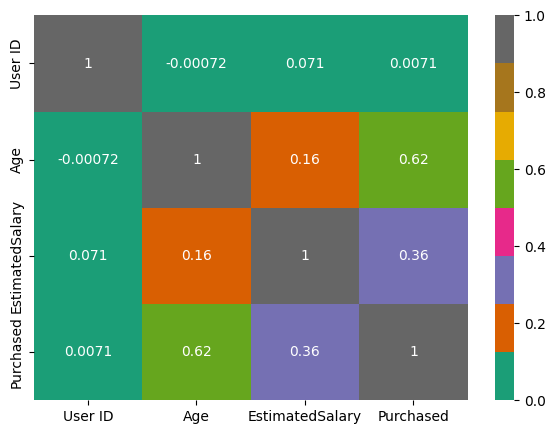

In [12]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, cmap='Dark2')
plt.show()

1. This code removes the column named "User ID" from the `DataFrame`. The inplace=True parameter means that the change is made directly to the DataFrame without the need to create a new DataFrame.

In [18]:
df.drop('User ID', axis = 1, inplace=True)

1. This code tells you how many occurrences there are of each unique value in the "Purchased" column of your DataFrame.

There are 257 instances where "Purchased" is 0.
There are 143 instances where "Purchased" is 1.
It's a count of how many times each value appears in the "Purchased" column.

In [19]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<Figure size 500x300 with 0 Axes>

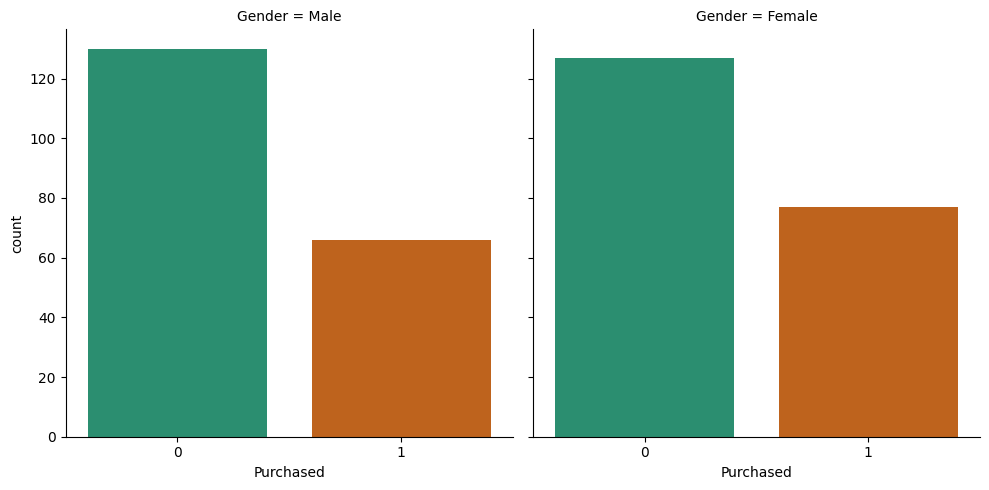

In [22]:
plt.figure(figsize=(5, 3))
sns.catplot(x='Purchased', col='Gender', kind='count', data=df,palette="Dark2");
plt.show()

1. This code creates a table (cross-tabulation) that shows the percentage of "Purchased" values (0 or 1) for each category of "Gender" in a DataFrame (df). The background color of the cells is shaded based on the values using the 'crest' color scheme.

37.74% of female customers have purchased a product from social networking advertisment where as only 33.67% of male customers purchased from social networking advertisment.

In [23]:
pd.crosstab(df.Gender,df.Purchased,normalize = "index" ).style.background_gradient(cmap='crest')

Purchased,0,1
Gender,,
Female,0.622549,0.377451
Male,0.663265,0.336735


The data is skewed towards the age group of 35-38, indicating that more people in the dataset fall within this age range. Similarly, the estimated salary data is skewed towards the range of 70,000 to 90,000, meaning that many individuals in the dataset have estimated salaries within this range. Skewness in the data distribution implies that certain values or ranges are more common or prevalent.

<Axes: xlabel='Age', ylabel='Count'>

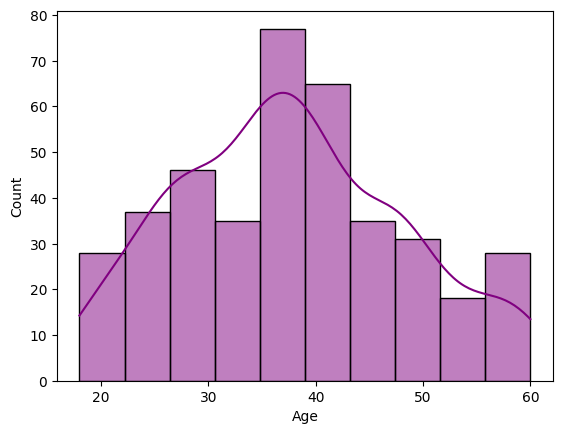

In [25]:
sns.histplot(df['Age'],kde=True,color='purple',bins=10)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

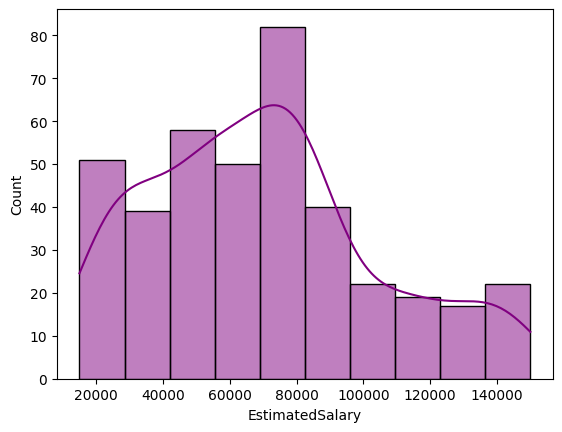

In [27]:
sns.histplot(df['EstimatedSalary'],kde=True,color='purple',bins=10)

In [30]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first=True)
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [31]:
X = df.drop(['Purchased'],axis = 1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
cols = X_train.columns
cols
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

# KNN with Minkowski and K=5

In [34]:
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)
y_pred = classifierKNN.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [35]:
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[64  4]
 [ 3 29]]


Overall Accuracy is 93% and Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90%.

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



From the plot it is clear from K =5 to K =18 the error rate is lowest and K= 35 error rate is maximum.

Text(0, 0.5, 'Error Rate')

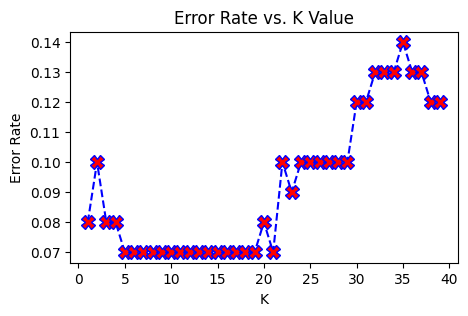

In [41]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(5,3))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
classifierKNN1 = KNeighborsClassifier(n_neighbors = 35, metric = 'minkowski', p = 2)
classifierKNN1.fit(X_train, y_train)
y_pred = classifierKNN1.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[65  3]
 [11 21]]


Overall Accuracy is 86% and Precision, Recall and F1-score for predicting not purchased category is above 87% and for purchased category is close to 67%.

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90        68
           1       0.88      0.66      0.75        32

    accuracy                           0.86       100
   macro avg       0.87      0.81      0.83       100
weighted avg       0.86      0.86      0.85       100

